1) Delivery_time -> Predict delivery time using sorting time.

------------------------------------------------------------

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using Python.

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [43]:
from google.colab import files
uploaded=files.upload()

Saving delivery_time.csv to delivery_time (1).csv


In [44]:
data=pd.read_csv("delivery_time.csv")
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [45]:
data1=data.rename(columns={'Delivery Time':'DT','Sorting Time':'ST'})
data1

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [46]:
data1.shape

(21, 2)

In [47]:
data1.isna().sum()

DT    0
ST    0
dtype: int64

In [48]:
data1.dtypes

DT    float64
ST      int64
dtype: object

In [49]:
data1.describe()

,DT,ST
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [50]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DT      21 non-null     float64
 1   ST      21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


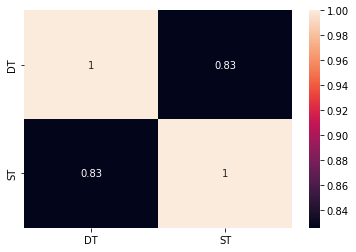

In [51]:
corrMatrix=data1.corr()
sns.heatmap(corrMatrix,annot=True)
plt.show()

<AxesSubplot:>

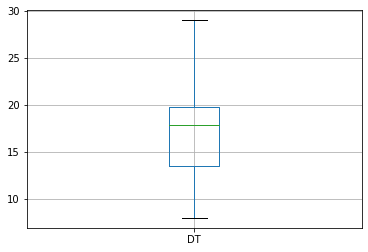

In [52]:
data1.boxplot(column=['DT'])

<AxesSubplot:>

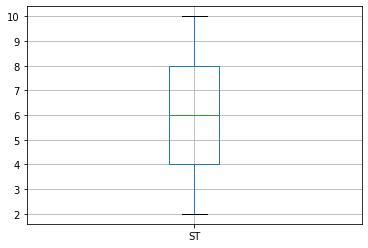

In [53]:
data1.boxplot(column=['ST'])

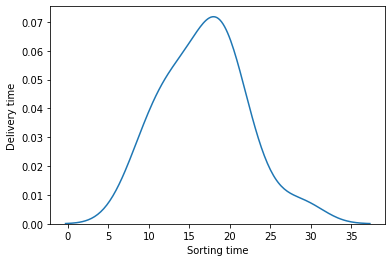

In [54]:
sns.distplot(a=data1['DT'],hist=False)
plt.xlabel("Sorting time")
plt.ylabel("Delivery time")
plt.show()

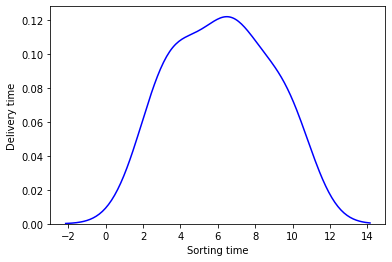

In [55]:
sns.distplot(a=data1['ST'],hist=False,color='Blue')
plt.xlabel("Sorting time")
plt.ylabel("Delivery time")
plt.show()

<AxesSubplot:>

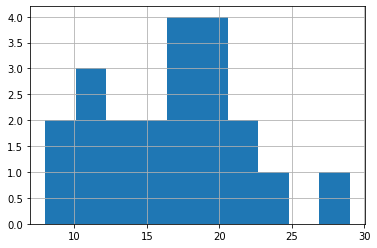

In [56]:
data1['DT'].hist()

<AxesSubplot:>

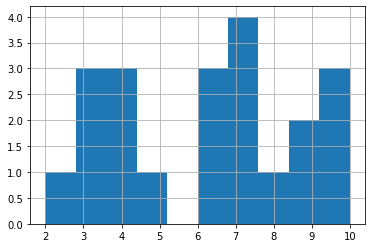

In [57]:
data1['ST'].hist()

<AxesSubplot:xlabel='DT', ylabel='Density'>

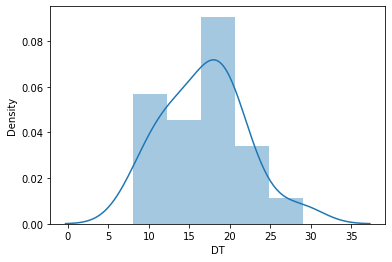

In [58]:
sns.distplot(data1['DT'])

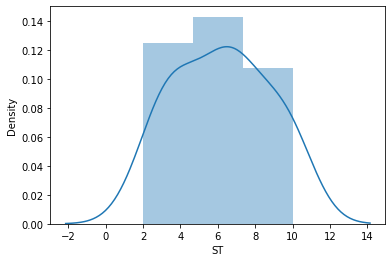

In [59]:
sns.distplot(data1['ST']);

In [60]:
data1.skew()

DT    0.352390
ST    0.047115
dtype: float64

In [61]:
data1.kurtosis()

DT    0.317960
ST   -1.148455
dtype: float64

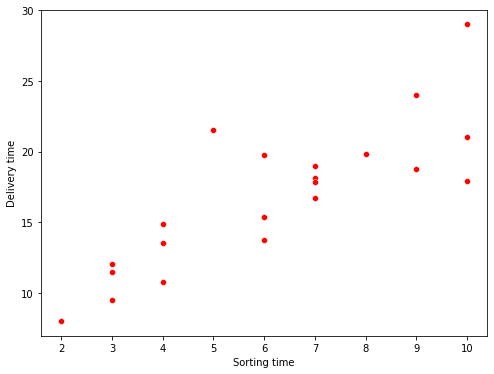

In [62]:
plt.figure(figsize=(8,6))
sns.scatterplot(y='DT',x='ST',data=data1,color='red',)
plt.xlabel("Sorting time")
plt.ylabel("Delivery time")
plt.show()

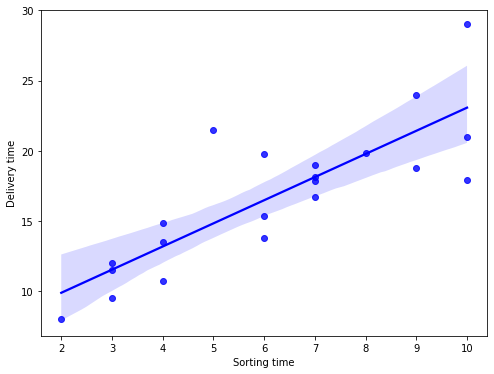

In [63]:
plt.figure(figsize=(8,6))
sns.regplot('ST','DT',data=data1,color='blue')
plt.xlabel("Sorting time")
plt.ylabel("Delivery time")
plt.show()

In [64]:
import statsmodels.formula.api as smf
model=smf.ols('DT~ST',data=data1).fit()

In [65]:
model.params

Intercept    6.582734
ST           1.649020
dtype: float64

In [66]:
print(model.tvalues,'\n',model.pvalues)

Intercept    3.823349
ST           6.387447
dtype: float64 
 Intercept    0.001147
ST           0.000004
dtype: float64


In [67]:
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [68]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 07 Mar 2023   Prob (F-statistic):           3.98e-06
Time:                        08:15:20   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
ST             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

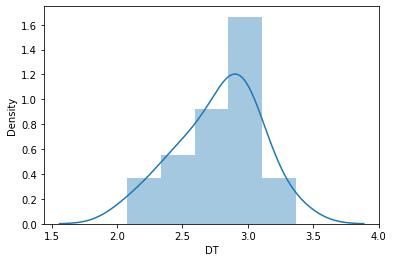

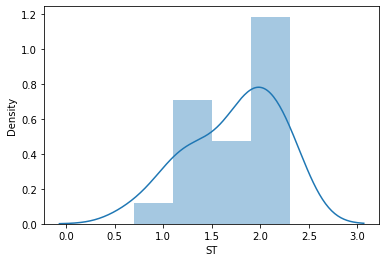

<Figure size 432x288 with 0 Axes>

In [69]:
data_1=data1
data_1['DT']=np.log(data_1['DT'])
data_1['ST']=np.log(data_1['ST'])
sns.distplot(data_1['DT'])
fig=plt.figure()
sns.distplot(data_1['ST'])
fig=plt.figure()

In [70]:
model2=smf.ols("ST~DT",data=data_1).fit()

In [71]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ST   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Tue, 07 Mar 2023   Prob (F-statistic):           1.60e-07
Time:                        08:15:21   Log-Likelihood:                 2.1913
No. Observations:                  21   AIC:                           -0.3826
Df Residuals:                      19   BIC:                             1.706
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8573      0.450     -4.131      0.001      -2.798      -0.916
DT             1.2923      0.161      8.024      0.000       0.955       1.629
==============================================================================
Omnibus:                        0.197   Durbin-Watson:                   1.365
Prob(Omnibus):                  0.906   Jarque-Bera (JB):                0.258
Skew:                          -0.192   Prob(JB):                        0.879
Kurtosis:                       2.617   Cond. No.                         28.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

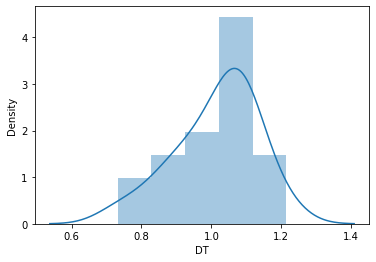

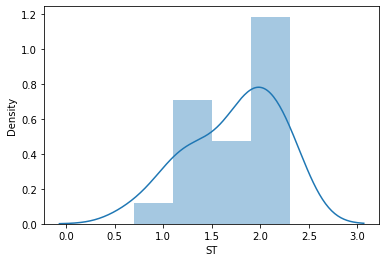

<Figure size 432x288 with 0 Axes>

In [72]:
data_2=data1
data_1['DT'] = np.log(data_1['DT'])
sns.distplot(data_1['DT'])
fig = plt.figure()
sns.distplot(data_1['ST'])
fig = plt.figure()

In [73]:
model3=smf.ols("ST~DT",data=data_2).fit()

In [74]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ST   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     69.40
Date:                Tue, 07 Mar 2023   Prob (F-statistic):           9.13e-08
Time:                        08:16:40   Log-Likelihood:                 2.8038
No. Observations:                  21   AIC:                            -1.608
Df Residuals:                      19   BIC:                            0.4814
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8026      0.427     -4.225      0.000      -2.696      -0.910
DT             3.4823      0.418      8.331      0.000       2.607       4.357
==============================================================================
Omnibus:                        0.491   Durbin-Watson:                   1.273
Prob(Omnibus):                  0.782   Jarque-Bera (JB):                0.353
Skew:                          -0.289   Prob(JB):                        0.838
Kurtosis:                       2.737   Cond. No.                         17.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

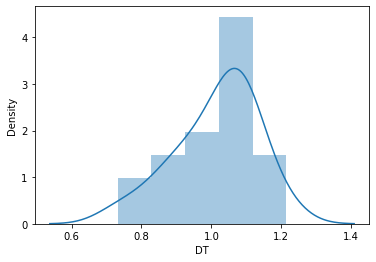

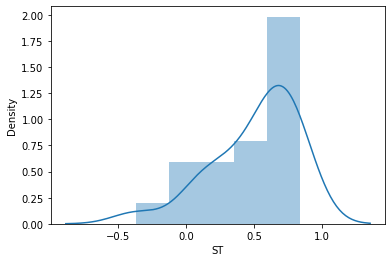

<Figure size 432x288 with 0 Axes>

In [75]:
data_3=data1
data_1['ST'] = np.log(data_1['ST'])
sns.distplot(data_1['DT'])
fig = plt.figure()
sns.distplot(data_1['ST'])
fig = plt.figure()

In [76]:
model4=smf.ols("ST~DT",data=data_3).fit()

In [77]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ST   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     77.21
Date:                Tue, 07 Mar 2023   Prob (F-statistic):           4.05e-08
Time:                        08:18:18   Log-Likelihood:                 11.820
No. Observations:                  21   AIC:                            -19.64
Df Residuals:                      19   BIC:                            -17.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.9199      0.278     -6.913      0.000      -2.501      -1.339
DT             2.3908      0.272      8.787      0.000       1.821       2.960
==============================================================================
Omnibus:                        1.317   Durbin-Watson:                   1.506
Prob(Omnibus):                  0.518   Jarque-Bera (JB):                0.968
Skew:                          -0.237   Prob(JB):                        0.616
Kurtosis:                       2.061   Cond. No.                         17.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

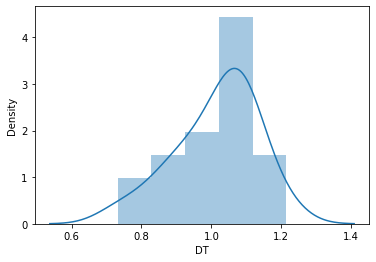

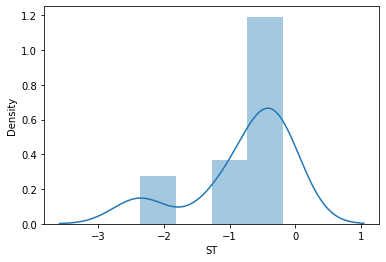

<Figure size 432x288 with 0 Axes>

In [78]:
data_4=data1
data_1['ST'] = np.log(data_1['ST'])
sns.distplot(data_1['DT'])
fig = plt.figure()
sns.distplot(data_1['ST'])
fig = plt.figure()

In [79]:
model5=smf.ols("ST~DT",data=data_4).fit()

In [80]:
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ST   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     36.41
Date:                Tue, 07 Mar 2023   Prob (F-statistic):           1.05e-05
Time:                        08:20:29   Log-Likelihood:                -10.855
No. Observations:                  20   AIC:                             25.71
Df Residuals:                      18   BIC:                             27.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.8748      1.013     -6.784      0.000      -9.004      -4.746
DT             5.9199      0.981      6.034      0.000       3.859       7.981
==============================================================================
Omnibus:                        1.228   Durbin-Watson:                   1.508
Prob(Omnibus):                  0.541   Jarque-Bera (JB):                1.051
Skew:                          -0.503   Prob(JB):                        0.591
Kurtosis:                       2.501   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Model 4 accuracy is high. That is where we should have stopped.